In [1]:
!ls ../annotations/ | grep json

annotations_nightowls_coco.json
few_shot_8_fair1m.json
few_shot_visdrone.json
few_shot_visdrone_val.json
few_shot_visdrone_val_vis_drone_val_thresh_0.3_patch_16.json
few_shot_visdrone_vis_drone_train_thresh_0.3_patch_16.json


In [1]:
import json

In [2]:
with open('../annotations/few_shot_visdrone_val.json') as f:
    data = json.load(f)

In [3]:
data

{'images': [{'file_name': '0000002_00005_d_0000014.jpg',
   'height': 540,
   'width': 960,
   'id': 0},
  {'file_name': '0000010_00569_d_0000056.jpg',
   'height': 765,
   'width': 1360,
   'id': 1},
  {'file_name': '0000047_01000_d_0000090.jpg',
   'height': 540,
   'width': 960,
   'id': 2},
  {'file_name': '0000068_00001_d_0000001.jpg',
   'height': 765,
   'width': 1360,
   'id': 3},
  {'file_name': '0000071_05298_d_0000008.jpg',
   'height': 765,
   'width': 1360,
   'id': 4},
  {'file_name': '0000072_05564_d_0000007.jpg',
   'height': 765,
   'width': 1360,
   'id': 5},
  {'file_name': '0000076_01012_d_0000004.jpg',
   'height': 765,
   'width': 1360,
   'id': 6},
  {'file_name': '0000076_04925_d_0000017.jpg',
   'height': 765,
   'width': 1360,
   'id': 7},
  {'file_name': '0000106_00673_d_0000050.jpg',
   'height': 540,
   'width': 960,
   'id': 8},
  {'file_name': '0000109_00606_d_0000062.jpg',
   'height': 1080,
   'width': 1920,
   'id': 9},
  {'file_name': '0000111_03678_d

In [4]:
data.keys()

dict_keys(['images', 'annotations', 'categories'])

In [10]:
data['images'][0] #['file_name']

{'file_name': '0000002_00005_d_0000014.jpg',
 'height': 540,
 'width': 960,
 'id': 0}

In [6]:
len(data['images'])

500

In [7]:
len(data['annotations'])

8896

In [8]:
data['annotations'][0]

{'image_id': 0,
 'category_id': 4,
 'bbox': [405, 118, 267, 72],
 'id': 0,
 'iscrowd': 0,
 'area': 19224}

In [60]:
[x['bbox'] for x in data['annotations'] if x['image_id'] == 2]

[[5, 0, 89, 78], [217, 178, 16, 18]]

In [61]:
[x['category_id'] for x in data['annotations'] if x['image_id'] == 2]

[4, 1]

In [63]:
[x['file_name'] for x in data['images'] if x['id'] == 2][0]

'0000047_01000_d_0000090.jpg'

In [57]:
data['annotations'][1]

{'image_id': 0,
 'category_id': 4,
 'bbox': [254, 21, 121, 130],
 'id': 1,
 'iscrowd': 0,
 'area': 15730}

In [17]:
def return_img_info(data):
    res = []
    for info in data['images']: # info == dct
        tmp_dct = info # dct
        tmp_dct['bboxes'] = [x['bbox'] for x in data['annotations'] if x['image_id']==info['id']]
        tmp_dct['categories'] = [x['category_id'] for x in data['annotations'] if x['image_id']==info['id']]
        res.append(tmp_dct)
        
    return res

In [18]:
res = return_img_info(data)

In [20]:
import cv2

In [26]:
path = '/lwll/development/vis_drone/vis_drone_full/train/'

In [28]:
img = cv2.imread(path + res[5]['file_name'])

In [29]:
import matplotlib.pyplot as plt

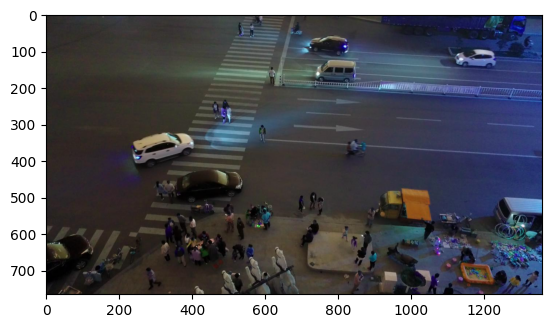

In [30]:
plt.imshow(img);

In [25]:
res[5]['file_name']

'0000072_05564_d_0000007.jpg'

In [44]:
def count(data, class_id):
#     count = 0
#     for annot in data:
#         if annot['category_id'] == class_id:
#             count += 1
    
    
    
    
    return len([x for x in data if x['category_id'] == class_id])

In [45]:
classes = {}

for x in data['categories']:
#     print(categories['id'])
    classes[x['id']] = count(data['annotations'], x['id'])

In [46]:
{1: "quhjhbx", 5: 'aldjcv'}

{1: 'quhjhbx', 5: 'aldjcv'}

In [48]:
classes = {x['id']: count(data['annotations'], x['id']) for x in data['categories']}

In [39]:
classes = {x['id']: len([y for y in data['annotations'] if y['category_id'] == x['id']]) for x in data['categories']}

In [40]:
classes

{1: 390,
 2: 242,
 3: 136,
 4: 191,
 5: 5703,
 6: 646,
 7: 63,
 8: 131,
 9: 24,
 10: 803,
 11: 567}

In [29]:
import matplotlib.pyplot as plt

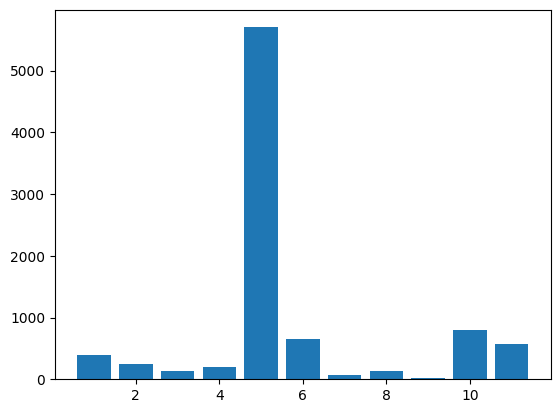

In [33]:
plt.bar(classes.keys(), classes.values());

In [28]:
classes

{1: 390,
 2: 242,
 3: 136,
 4: 191,
 5: 5703,
 6: 646,
 7: 63,
 8: 131,
 9: 24,
 10: 803,
 11: 567}

In [22]:
data['categories']

[{'id': 1, 'name': '1', 'supercategory': '1'},
 {'id': 2, 'name': '2', 'supercategory': '2'},
 {'id': 3, 'name': '3', 'supercategory': '3'},
 {'id': 4, 'name': '4', 'supercategory': '4'},
 {'id': 5, 'name': '5', 'supercategory': '5'},
 {'id': 6, 'name': '6', 'supercategory': '6'},
 {'id': 7, 'name': '7', 'supercategory': '7'},
 {'id': 8, 'name': '8', 'supercategory': '8'},
 {'id': 9, 'name': '9', 'supercategory': '9'},
 {'id': 10, 'name': '10', 'supercategory': '10'},
 {'id': 11, 'name': '11', 'supercategory': '11'}]